In [289]:
#1. Importar livrarias 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [290]:
#2. Ler o dataset desde o ficheiro csv

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [291]:
#3. Obter as primeiras cinco instâncias do dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [292]:
#4. Obter as ultimas cinco instâncias do dataset

df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [293]:
#5. Obter as dimensões do dataset

df.shape

(5110, 12)

In [294]:
#6. Obter informação geral do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [295]:
#7. Obter informações estatísticas das features numéricas.

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [296]:
#8. Obter a quantidade de missing values para cada feature

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [297]:
#9. Romove id column 

df = df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [298]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

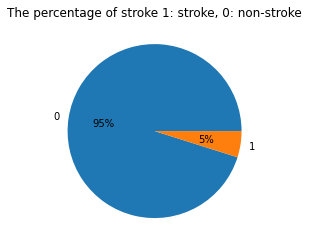

In [299]:
#10. Verificação do balanco do dataset 
#em relação ao resultado "stroke - non-stroke"

data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

plt.pie(data, labels = labels, autopct = '%.0f%%')
plt.title("The percentage of stroke 1: stroke, 0: non-stroke");

In [300]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

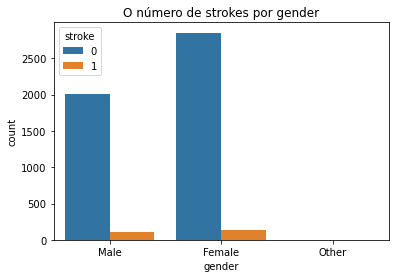

In [301]:
sns.countplot(data = df, x = 'gender', hue = 'stroke')
plt.title('O número de strokes por gender')
plt.show()

In [302]:
filterDfByGender = df[df['gender'] == 'Other']
filterDfByGender

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [303]:
# Basic transformation of age column from float to int
df['age'] = df['age'].astype('int')

In [304]:
df['age'].value_counts()

78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: age, Length: 83, dtype: int64

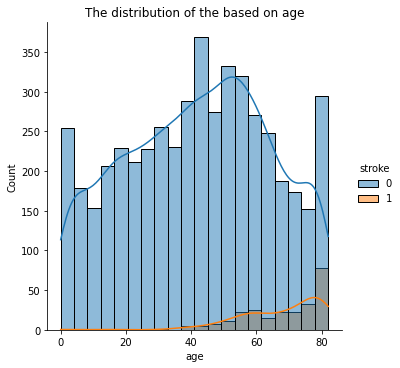

In [305]:
sns.displot(data = df, x = 'age', hue = 'stroke', kde = True)
plt.title('The distribution of the based on age')
plt.show()

In [306]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

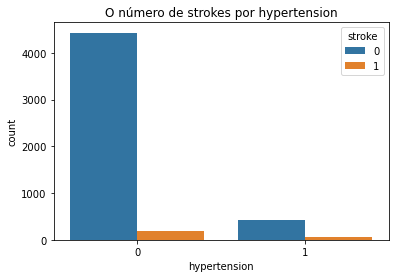

In [307]:
sns.countplot(data = df, x = 'hypertension', hue = 'stroke')
plt.title('O número de strokes por hypertension')
plt.show()

In [308]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

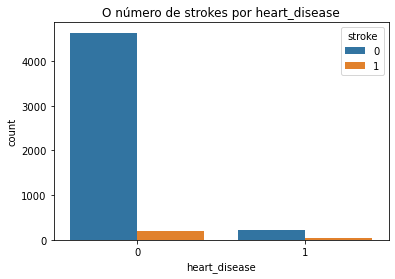

In [309]:
sns.countplot(data = df, x = 'heart_disease', hue = 'stroke')
plt.title('O número de strokes por heart_disease')
plt.show()

In [310]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

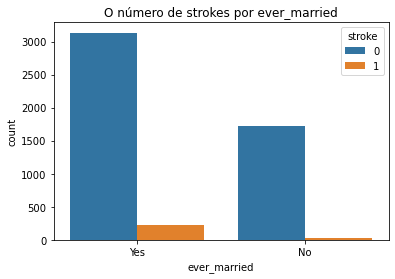

In [311]:
sns.countplot(data = df, x = 'ever_married', hue = 'stroke')
plt.title('O número de strokes por ever_married')
plt.show()

In [312]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

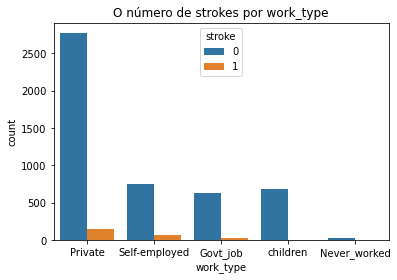

In [313]:
sns.countplot(data = df, x = 'work_type', hue = 'stroke')
plt.title('O número de strokes por work_type')
plt.show()

In [314]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

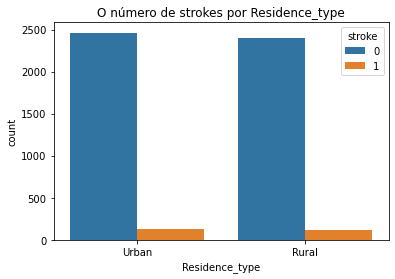

In [315]:
sns.countplot(data = df, x = 'Residence_type', hue = 'stroke')
plt.title('O número de strokes por Residence_type')
plt.show()

In [316]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

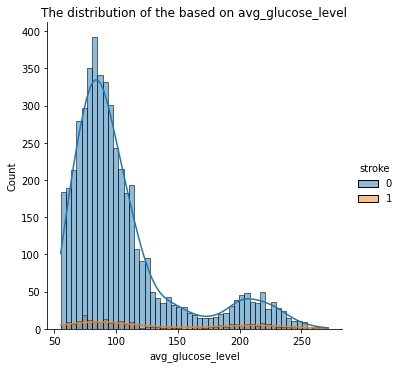

In [317]:
sns.displot(data = df, x = 'avg_glucose_level', hue = 'stroke', kde = True)
plt.title('The distribution of the based on avg_glucose_level')
plt.show()

In [318]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

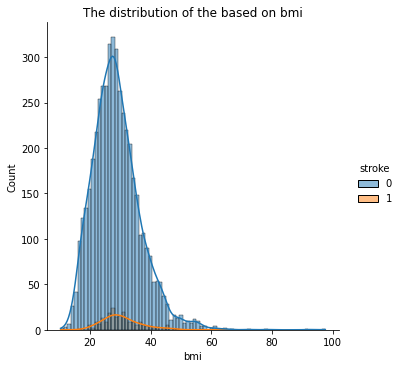

In [319]:
sns.displot(data = df, x = 'bmi', hue = 'stroke', kde = True)
plt.title('The distribution of the based on bmi')
plt.show()

In [320]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

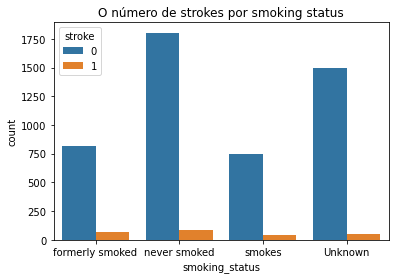

In [321]:
sns.countplot(data = df, x = 'smoking_status', hue = 'stroke')
plt.title('O número de strokes por smoking status')
plt.show()

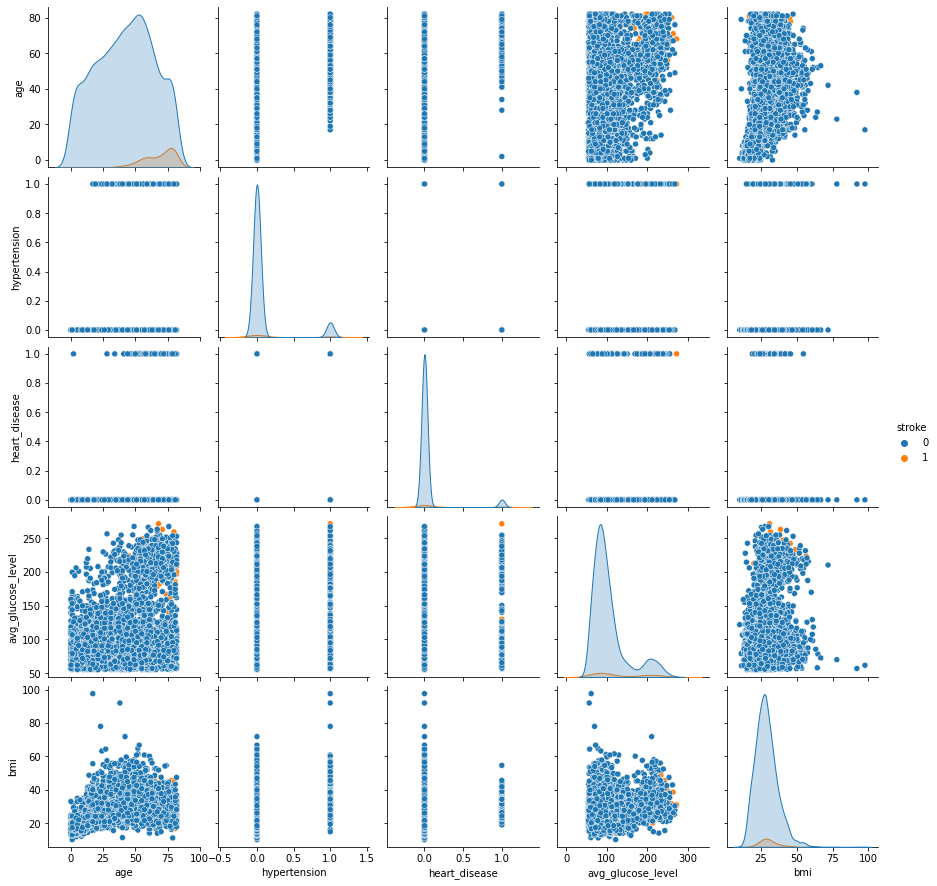

In [322]:
sns.pairplot(data = df, hue = 'stroke')

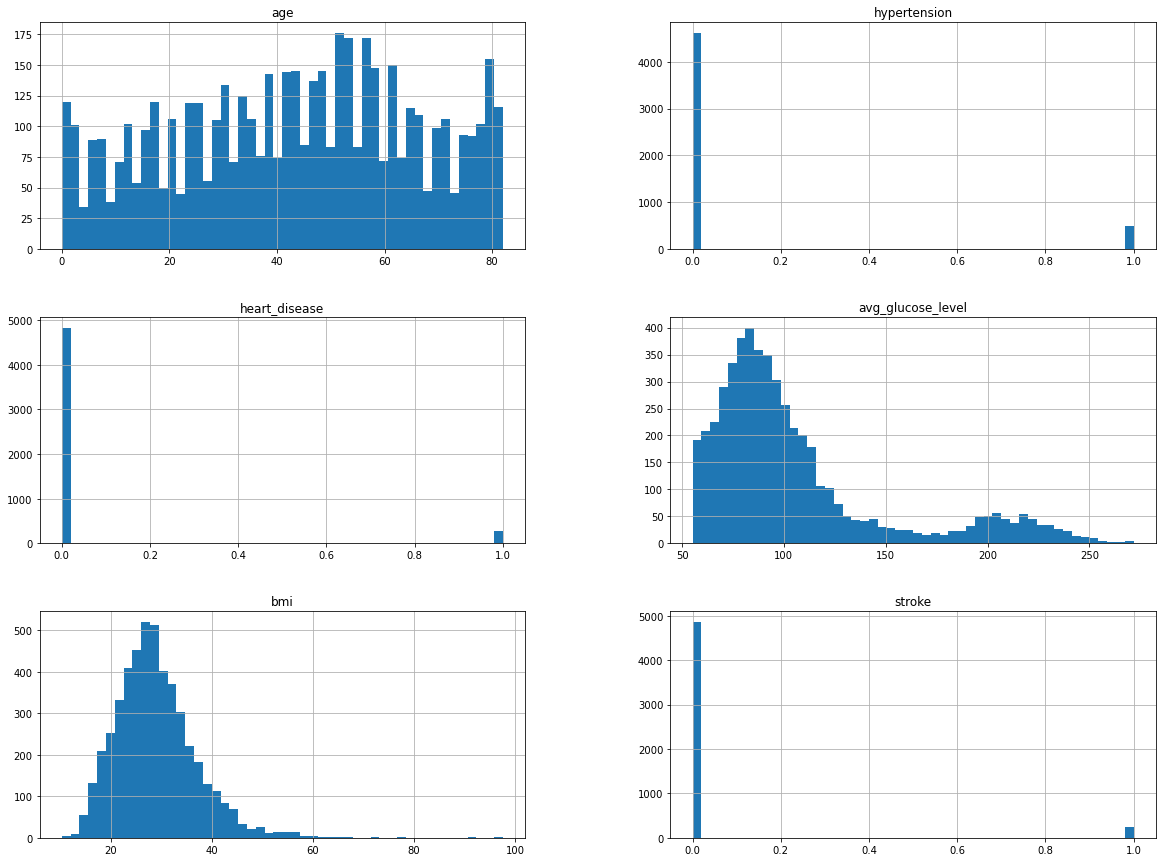

In [323]:
df.hist(bins=50, figsize = (20,15))
plt.show()

In [324]:
#9. Calculate and sort descending the correlation coefficients between the several
#features and the label “median_house_value”.

correlation = df.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276303,0.263668,0.238060,0.333738,0.245128
hypertension,0.276303,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263668,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238060,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333738,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245128,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

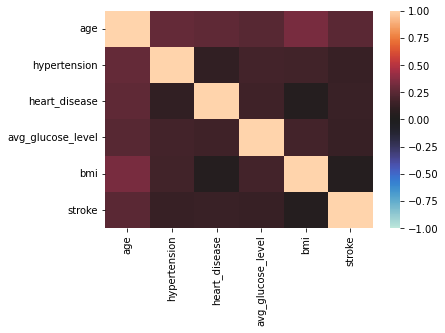

In [325]:
sns.heatmap(correlation, vmin = -1, vmax = 1, center = 0)

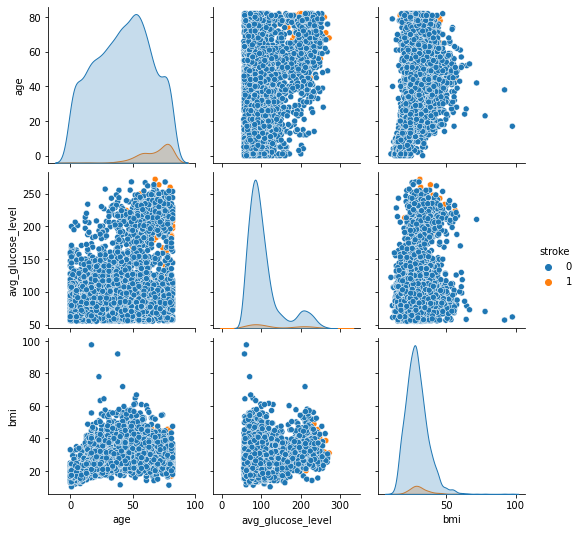

In [326]:
numerical_data = df[['age','avg_glucose_level','bmi','stroke']]
sns.pairplot(numerical_data, hue='stroke')

In [327]:
##################
#Data Preprocessing

In [328]:


train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [329]:
train_set.shape

(4088, 11)

In [330]:
test_set.shape

(1022, 11)

In [331]:
train_labels = train_set[['stroke']].copy()

train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 4152 to 235
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stroke  4088 non-null   int64
dtypes: int64(1)
memory usage: 63.9 KB


In [332]:
train_instances = train_set.drop('stroke', axis = 1).copy()

train_instances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 4152 to 235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   int32  
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3928 non-null   float64
 9   smoking_status     4088 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 335.3+ KB


In [333]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [334]:
inputer = SimpleImputer(strategy = 'median')

instances_to_imputer = train_instances[['bmi']]

X = inputer.fit_transform(instances_to_imputer)

train_instances['bmi'] = pd.DataFrame(X,
                                  columns = instances_to_imputer.columns,
                                  index = instances_to_imputer.index)
train_instances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 4152 to 235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   int32  
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                4088 non-null   float64
 9   smoking_status     4088 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 335.3+ KB


In [335]:
# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

# Initialize One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(train_instances[
    ['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status']]).toarray()

# Get newly encoded columns and concat them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
train_instances = pd.concat([train_instances,encodings] , axis=1)

# Drop original columns from the dataset after encoding is done
train_instances.drop(['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
train_instances.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4152,55.0,0.0,0.0,73.57,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,55.0,0.0,0.0,231.15,22.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5076,34.0,0.0,0.0,174.37,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,80.0,0.0,0.0,56.99,26.7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3534,61.0,0.0,0.0,108.18,19.1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [336]:
standard_scaler = StandardScaler()

df_to_scaler = train_instances[['age', 'avg_glucose_level','bmi']]

scaled_features = standard_scaler.fit_transform(df_to_scaler.values)

train_instances[df_to_scaler.columns] = pd.DataFrame(scaled_features, 
                               index = df_to_scaler.index, 
                               columns=df_to_scaler.columns)

train_instances

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4152,0.525989,0.0,0.0,-0.708689,-0.115854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,0.525989,0.0,0.0,2.769942,-0.858113,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5076,-0.401716,0.0,0.0,1.516505,-0.766958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,1.630400,0.0,0.0,-1.074698,-0.285141,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3534,0.791048,0.0,0.0,0.055339,-1.274819,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4072,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4077,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4081,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
